## Loading Data from local file

In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('./XYmat.csv')

In [21]:
df.head(5)

,name,reviews,FPS,Gore,Action,Demons,Shooter,First-Person,Great Soundtrack,Multiplayer,...,Pool,Documentary,Word Game,Feature Film,Spelling,achievements,prices,Valve,Accounting,Number of genres
0,PLAYERUNKNOWN'S BATTLEGROUNDS,92,1,0,1,0,1,1,0,1,...,0,0,0,0,0,37,29.99,0,0,3
1,BATTLETECH,49,0,0,1,0,0,0,1,1,...,0,0,0,0,0,128,39.99,0,0,3
2,DayZ,71,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,44.99,0,0,3
3,EVE Online,61,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0.00,0,0,5
4,Grand Theft Auto V: Premium Online Edition,74,0,0,1,0,0,0,0,0,...,0,0,0,0,0,51,59.99,0,0,1


In [22]:
df.columns

Index(['name', 'reviews', 'FPS', 'Gore', 'Action', 'Demons', 'Shooter',
       'First-Person', 'Great Soundtrack', 'Multiplayer',
       ...
       'Pool', 'Documentary', 'Word Game', 'Feature Film', 'Spelling',
       'achievements', 'prices', 'Valve', 'Accounting', 'Number of genres'],
      dtype='object', length=383)

In [23]:
df.index

RangeIndex(start=0, stop=11766, step=1)

In [24]:
df.values

array([["PLAYERUNKNOWN'S BATTLEGROUNDS", 92, 1, ..., 0, 0, 3],
       ['BATTLETECH', 49, 0, ..., 0, 0, 3],
       ['DayZ', 71, 1, ..., 0, 0, 3],
       ...,
       ['Chicken Farm 2K17 - Premium', 99, 0, ..., 0, 0, 3],
       ['TANE DLC - ZecRail 2017 Christmas Train', 96, 0, ..., 0, 0, 5],
       ['TANE DLC - EMD GP50 - Burlington Northern (Phase I)', 100, 0,
        ..., 0, 0, 2]], dtype=object)

In [25]:
y = df['reviews'].values
array = df.to_numpy()
X = array[:, 2:]
print(X)

[[1 0 1 ... 0 0 3]
 [0 0 1 ... 0 0 3]
 [1 0 1 ... 0 0 3]
 ...
 [0 0 0 ... 0 0 3]
 [0 0 1 ... 0 0 5]
 [0 0 1 ... 0 0 2]]


## Split train test data

In [26]:
num_train = len(df) // 10 * 7

Xtrain = X[:num_train]
Xtest = X[num_train:]
ytrain = y[:num_train]
ytest = y[num_train:]
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(8232, 381) (3534, 381) (8232,) (3534,)


## Test data with multiple linear regression

In [27]:
import scipy as sp
import scipy.sparse.linalg
import math

In [28]:
out = sp.sparse.linalg.lsqr(Xtrain,ytrain)
beta = out[0]
print(beta.shape)

(381,)


## Compute Baseline

In [29]:
yBaseline = np.ones(len(ytest)) * np.mean(ytrain)
errs = np.array(abs(ytest - yBaseline))
loss = np.sum(errs)
avgL = loss/len(ytest)
print("multiple variable loss="+"{:.2e}".format(avgL))

multiple variable loss=2.33e+01


In [30]:
## Compute loss with linear regression

In [31]:
yp = Xtest@beta

errs = np.array(abs(ytest - yp))
loss = np.sum(errs)
avgL = np.mean(avgL)

print("multiple variable loss="+"{:.2e}".format(avgL))

arr = []
for i in range(len(ytest)):
    arr.append(abs(yp[i]-ytest[i]))
arr.sort(reverse = True)
for i in range(50):
    print(arr[i])

multiple variable loss=2.33e+01
127.9377496786397
103.33634859848365
102.16632220439112
101.97765062904031
100.30717723606364
96.87294955252293
93.40198665241388
92.81213337048706
92.68027206676487
91.57836623173634
90.73023916762554
90.49483843932205
90.33937125491295
88.90611783405402
88.80629994924374
88.47897196253814
87.08305410787904
87.06901602771026
86.85672443285068
86.54974389055315
86.38210844309202
85.96767729628633
85.22121952958068
84.19994152999561
82.89653095831673
82.73398962204061
82.40817392666747
82.10797776054801
81.19330904435535
79.80167395531842
79.63384319179451
78.94014816669369
78.49010690068482
78.42134160138596
77.78783688695441
77.47582028012266
77.44485022624248
76.62103029021007
75.74790475735998
75.44485022624248
74.88970265867934
74.71286714226216
74.50792123090332
74.33207942148033
73.87905151576223
73.78645475668739
72.74012578888312
72.70521162567223
72.49528736838795
72.44201532332062


In [32]:
import matplotlib.pyplot as plt



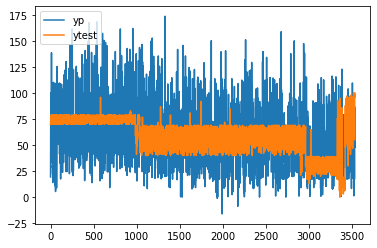

In [33]:


plt.plot(yp, label = "yp")
plt.plot(ytest, label = "ytest")
plt.legend(loc="upper left")
axes = plt.gca()
#axes.set_xlim([0,500])
#axes.set_ylim([0,150])
plt.show()

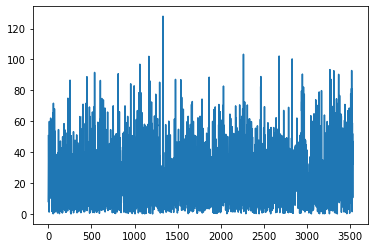

In [34]:
plt.plot(errs)

In [35]:
print(np.mean(errs))

23.4235688900828
